In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/OrgAIMLTraining/input_data.xlsx')
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


There are 4 columns and all are text.

'Shore Description' and 'Description' have 8 and 1 null values.

Caller can be dropped.

'Assignment group' column is Y which has multiple classes. This is a supervised ML

In [71]:
df.drop(['Caller'], axis=1, inplace=True) # it will not provide any important imformation for classification

In [72]:
df[df.isna().any(axis=1)] # check the missing values

,Short description,Description,Assignment group
2604,NaN,_x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...,GRP_34
3383,NaN,_x000D_\n-connected to the user system using t...,GRP_0
3906,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3910,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3915,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3921,NaN,-user unable tologin to vpn._x000D_\n-connect...,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,GRP_0
4341,NaN,_x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...,GRP_0
4395,i am locked out of skype,NaN,GRP_0


In [73]:
# we can merge short description and description column and create a new feature
df.fillna('', inplace=True)
df['merged_description'] = df['Short description'] + ' ' +df['Description']
df.isna().sum()

Short description     0
Description           0
Assignment group      0
merged_description    0
dtype: int64

In [74]:
import re
def clean_text(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove non-alphanumeric characters except for whitespace

def remove_numbers(text):
    # Remove all digits from the text
    return " ".join([word for word in text.split() if not re.search(r'\d', word)])

df['Cleaned_Text'] = df['merged_description'].apply(clean_text)  # Create a new column with cleaned text
df['Cleaned_Text'] = df['Cleaned_Text'].apply(remove_numbers)  # Create a new column without numbers

In [75]:
group_counts = df['Assignment group'].value_counts()
group_counts

Assignment group
GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_64       1
GRP_67       1
GRP_35       1
GRP_70       1
GRP_73       1
Name: count, Length: 74, dtype: int64

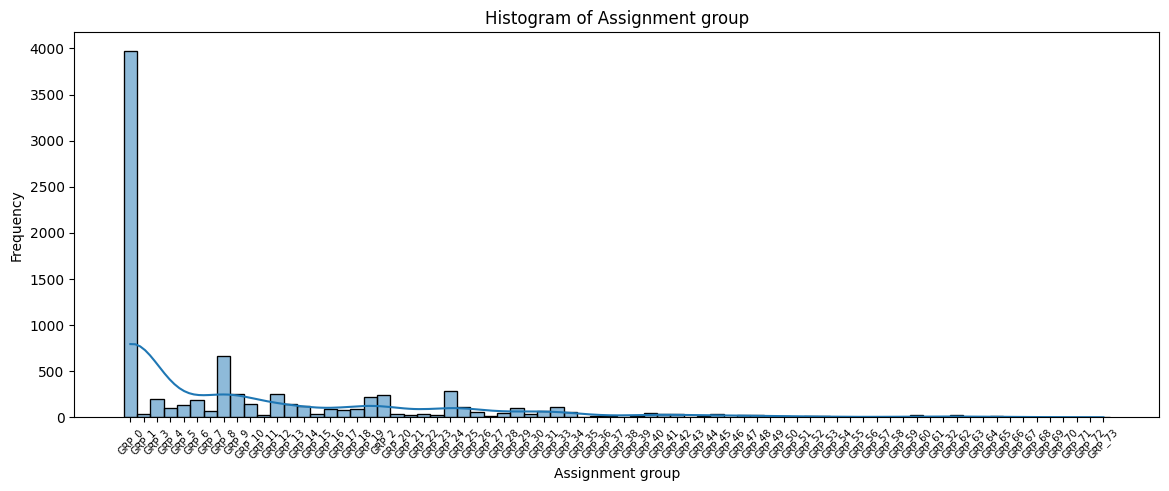

In [76]:
#This is multiclass classification, let's visualize it.
plt.figure(figsize=(14, 5))
sns.histplot(df['Assignment group'], kde=True)
plt.title('Histogram of Assignment group')
plt.xticks(rotation=45, fontsize=7)
plt.ylabel('Frequency')
plt.show()

<ipython-input-77-eb624d2dd880>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_groups.head(10).index, y=top_10_groups.head(10).values, palette='viridis')


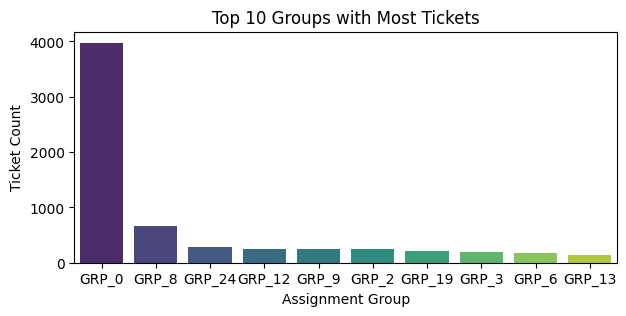

In [77]:
#looks like data is imbalanced. need to handle it.

top_10_groups = group_counts.head(10)
plt.figure(figsize=(7, 3))
sns.barplot(x=top_10_groups.head(10).index, y=top_10_groups.head(10).values, palette='viridis')
plt.title('Top 10 Groups with Most Tickets')
plt.xlabel('Assignment Group')
plt.ylabel('Ticket Count')
plt.show()

<ipython-input-78-724f67a2e884>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subset.index, y=top_subset.values, palette='viridis')


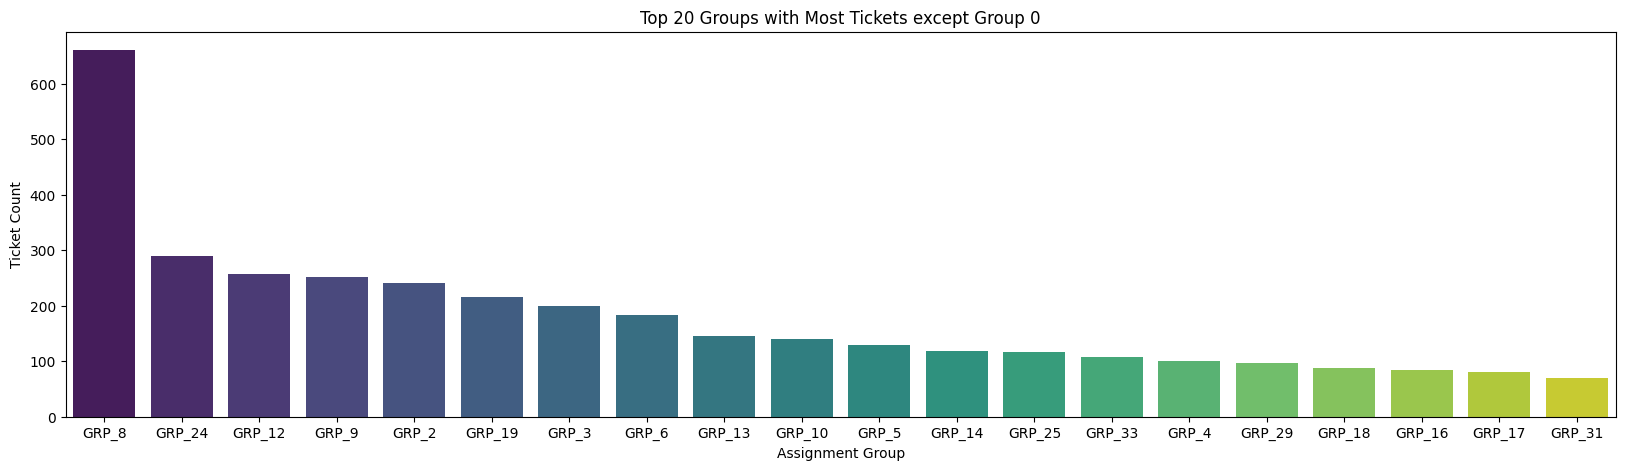

In [78]:
#looks like data is imbalanced. need to handle it.

top_subset = group_counts[1:21]
plt.figure(figsize=(20, 5))
sns.barplot(x=top_subset.index, y=top_subset.values, palette='viridis')
plt.title('Top 20 Groups with Most Tickets except Group 0')
plt.xlabel('Assignment Group')
plt.ylabel('Ticket Count')
plt.show()

<ipython-input-79-b67685276a2b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_20_groups.index, y=bottom_20_groups.values, palette='viridis')


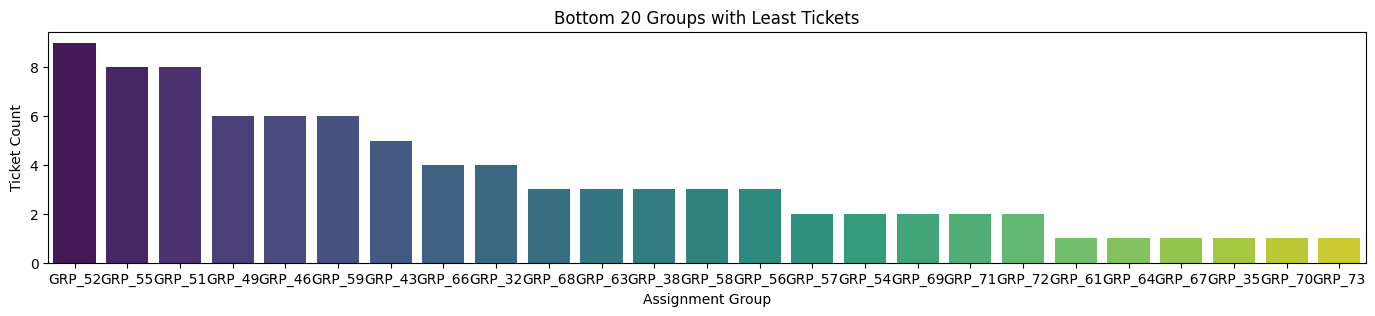

In [79]:
bottom_20_groups = group_counts[group_counts<10]
plt.figure(figsize=(17, 3))
sns.barplot(x=bottom_20_groups.index, y=bottom_20_groups.values, palette='viridis')
plt.title('Bottom 20 Groups with Least Tickets')
plt.xlabel('Assignment Group')
plt.ylabel('Ticket Count')
plt.show()

In [80]:
!pip install imbalanced-learn

Assignment group
GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
Name: count, dtype: int64
Assignment group
GRP_0     1
GRP_59    1
GRP_57    1
GRP_56    1
GRP_55    1
GRP_54    1
GRP_53    1
GRP_52    1
GRP_51    1
GRP_50    1
Name: count, dtype: int64


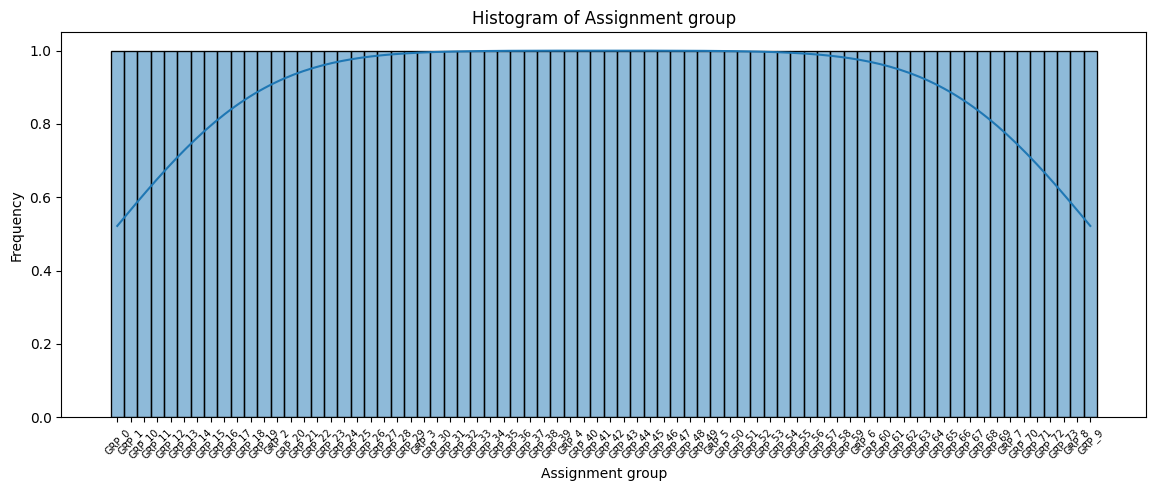

In [81]:
from imblearn.under_sampling import RandomUnderSampler

print(df['Assignment group'].value_counts().head(10))

# Initialize the under-sampler
rus = RandomUnderSampler()

# Fit and apply the under-sampler to create a more balanced distribution
df_under, _ = rus.fit_resample(df[['Assignment group']], df['Assignment group'])

# Check the distribution after under-sampling
print(df_under['Assignment group'].value_counts().head(10))

#This is multiclass classification, let's visualize it.
plt.figure(figsize=(14, 5))
sns.histplot(df_under['Assignment group'], kde=True)
plt.title('Histogram of Assignment group')
plt.xticks(rotation=45, fontsize=7)
plt.ylabel('Frequency')
plt.show()


In [82]:
df_small_classes = df[df['Assignment group'].isin(bottom_20_groups.index)]
df_small_classes

,Short description,Description,Assignment group,merged_description,Cleaned_Text
401,need access to erp kp06789,need access to kp06789 to enter forecast for i...,GRP_35,need access to erp kp06789 need access to kp06...,need access to erp need access to to enter for...
461,"hpqc delivers error message: ""user is not main...",my user id: thrydksd'\niÂ´m involved in uat ua...,GRP_38,"hpqc delivers error message: ""user is not main...",hpqc delivers error message user is not mainta...
626,production order number issue,\n\nreceived from: zuxcfonv.nyhpkrbe@gmail.com...,GRP_43,production order number issue \n\nreceived fr...,production order number issue received from zu...
841,error with customization (engineering tool) - ...,"hi team, \n\ni need your help with two error t...",GRP_46,error with customization (engineering tool) - ...,error with customization engineering tool erp ...
1143,please redirect to local it: word document 134...,das folgende word-dokument kann nicht mehr bea...,GRP_49,please redirect to local it: word document 134...,please redirect to local it word document brok...
...,...,...,...,...,...
8171,job qeue from the engg application stopped,the job qeue processor of the engg stopped and...,GRP_58,job qeue from the engg application stopped the...,job qeue from the engg application stopped the...
8197,oneteam sso not working,i'm unable to log in to hr_tool/oneteam throug...,GRP_73,oneteam sso not working i'm unable to log in t...,oneteam sso not working im unable to log in to...
8341,help with mss worklist since manager left company,from: qekdgaim wagshrzl _x000D_\nsent: saturda...,GRP_52,help with mss worklist since manager left comp...,help with mss worklist since manager left comp...
8387,ticket (ticket_no1538972) update to anftgup nf...,ticket (ticket_no1538972) update to anftgup nf...,GRP_72,ticket (ticket_no1538972) update to anftgup nf...,ticket update to anftgup nftgyair ticket updat...


Assignment group
GRP_35    9
GRP_61    9
GRP_72    9
GRP_71    9
GRP_70    9
GRP_69    9
GRP_68    9
GRP_67    9
GRP_66    9
GRP_64    9
GRP_63    9
GRP_32    9
GRP_59    9
GRP_38    9
GRP_58    9
GRP_57    9
GRP_56    9
GRP_55    9
GRP_54    9
GRP_52    9
GRP_51    9
GRP_49    9
GRP_46    9
GRP_43    9
GRP_73    9
Name: count, dtype: int64


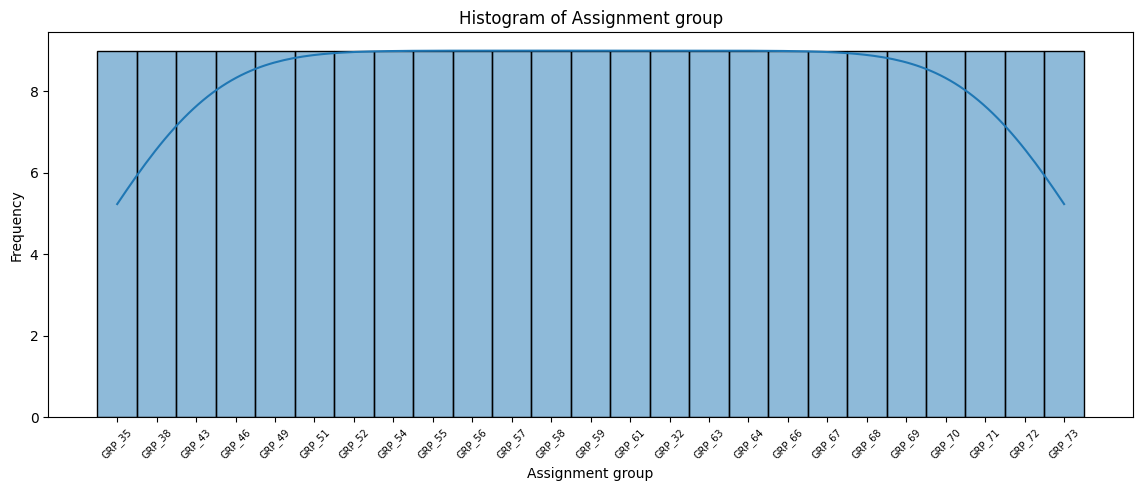

In [83]:
from imblearn.over_sampling import RandomOverSampler

# Initialize the over-sampler
ros = RandomOverSampler(random_state=42)

# Fit and apply the over-sampler to create a more balanced distribution
df_over, _ = ros.fit_resample(df_small_classes[['Assignment group', 'Cleaned_Text']], df_small_classes['Assignment group'])

# Check the distribution after over-sampling
print(df_over['Assignment group'].value_counts())

#This is multiclass classification, let's visualize it.
plt.figure(figsize=(14, 5))
sns.histplot(df_over['Assignment group'], kde=True)
plt.title('Histogram of Assignment group')
plt.xticks(rotation=45, fontsize=7)
plt.ylabel('Frequency')
plt.show()

In [84]:
df = pd.concat([df, df_over], ignore_index=True)  # `ignore_index=True` ensures a continuous index
df.shape

(8725, 5)

In [85]:
df['Cleaned_Text'].isna().sum()

0

In [86]:
X = df['Cleaned_Text']
X

0       login issue verified user detailsemployee mana...
1       outlook received from hello my meetingsskype m...
2       cant log in to vpn received from i cannot log ...
3       unable to access hrtool page unable to access ...
4                                 skype error skype error
                              ...                        
8720    oneteam sso not working im unable to log in to...
8721    oneteam sso not working im unable to log in to...
8722    oneteam sso not working im unable to log in to...
8723    oneteam sso not working im unable to log in to...
8724    oneteam sso not working im unable to log in to...
Name: Cleaned_Text, Length: 8725, dtype: object

In [87]:
#Tokenization

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize_words(text):
    return word_tokenize(text)  # Return list of word tokens

df['Cleaned_Tokens'] = df['Cleaned_Text'].apply(tokenize_words)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Short description,Description,Assignment group,merged_description,Cleaned_Text,Cleaned_Tokens
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,login issue verified user detailsemployee mana...,"[login, issue, verified, user, detailsemployee..."
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook received from hello my meetingsskype m...,"[outlook, received, from, hello, my, meetingss..."
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn received from i cannot log ...,"[cant, log, in, to, vpn, received, from, i, ca..."
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page unable to access...,unable to access hrtool page unable to access ...,"[unable, to, access, hrtool, page, unable, to,..."
4,skype error,skype error,GRP_0,skype error skype error,skype error skype error,"[skype, error, skype, error]"
...,...,...,...,...,...,...
8720,NaN,NaN,GRP_73,NaN,oneteam sso not working im unable to log in to...,"[oneteam, sso, not, working, im, unable, to, l..."
8721,NaN,NaN,GRP_73,NaN,oneteam sso not working im unable to log in to...,"[oneteam, sso, not, working, im, unable, to, l..."
8722,NaN,NaN,GRP_73,NaN,oneteam sso not working im unable to log in to...,"[oneteam, sso, not, working, im, unable, to, l..."
8723,NaN,NaN,GRP_73,NaN,oneteam sso not working im unable to log in to...,"[oneteam, sso, not, working, im, unable, to, l..."


In [88]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Apply the function to remove stopwords from 'Word_Tokens'
df['Filtered_Word_Tokens'] = df['Cleaned_Tokens'].apply(remove_stopwords)

print(df[['Cleaned_Tokens', 'Filtered_Word_Tokens']])


                                         Cleaned_Tokens  \
0     [login, issue, verified, user, detailsemployee...   
1     [outlook, received, from, hello, my, meetingss...   
2     [cant, log, in, to, vpn, received, from, i, ca...   
3     [unable, to, access, hrtool, page, unable, to,...   
4                          [skype, error, skype, error]   
...                                                 ...   
8720  [oneteam, sso, not, working, im, unable, to, l...   
8721  [oneteam, sso, not, working, im, unable, to, l...   
8722  [oneteam, sso, not, working, im, unable, to, l...   
8723  [oneteam, sso, not, working, im, unable, to, l...   
8724  [oneteam, sso, not, working, im, unable, to, l...   

                                   Filtered_Word_Tokens  
0     [login, issue, verified, user, detailsemployee...  
1     [outlook, received, hello, meetingsskype, meet...  
2                 [cant, log, vpn, received, log, best]  
3     [unable, access, hrtool, page, unable, access,...  
4

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def apply_stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

df['Stems'] = df['Filtered_Word_Tokens'].apply(apply_stemming)

print(df[['Filtered_Word_Tokens', 'Stems']])


                                   Filtered_Word_Tokens  \
0     [login, issue, verified, user, detailsemployee...   
1     [outlook, received, hello, meetingsskype, meet...   
2                 [cant, log, vpn, received, log, best]   
3     [unable, access, hrtool, page, unable, access,...   
4                          [skype, error, skype, error]   
...                                                 ...   
8720  [oneteam, sso, working, im, unable, log, hrtoo...   
8721  [oneteam, sso, working, im, unable, log, hrtoo...   
8722  [oneteam, sso, working, im, unable, log, hrtoo...   
8723  [oneteam, sso, working, im, unable, log, hrtoo...   
8724  [oneteam, sso, working, im, unable, log, hrtoo...   

                                                  Stems  
0     [login, issu, verifi, user, detailsemploye, ma...  
1     [outlook, receiv, hello, meetingsskyp, meet, e...  
2                   [cant, log, vpn, receiv, log, best]  
3     [unabl, access, hrtool, page, unabl, access, h...  
4

In [90]:
X= df['Stems'].apply(lambda tokens: " ".join(tokens))

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',
max_features= 100, # keep top 100 terms
max_df = 0.5,
smooth_idf=True)

print(vectorizer)
transformed_vector = vectorizer.fit_transform(X)
transformed_vector


# The given code snippet initializes a TfidfVectorizer from the sklearn.feature_extraction.text module to convert a collection of text documents into a matrix of TF-IDF features. Here's what each part of the code snippet does:

# TfidfVectorizer
# TF-IDF:
# TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a statistical measure used to evaluate the importance of a term in a document relative to a collection of documents (corpus).
# Term Frequency (TF): Measures how often a term appears in a document.
# Inverse Document Frequency (IDF): Measures how often a term appears across the entire corpus. The more frequently a term appears, the lower its IDF value (i.e., it's less unique or distinctive).
# Purpose of TfidfVectorizer:
# Converts a collection of text documents into a TF-IDF matrix.
# Each row represents a document, and each column represents a term.
# The value at each cell is the TF-IDF score for that term in that document.
# Parameters of TfidfVectorizer
# stop_words='english':
# Specifies that common English words (like "and", "the", "is", etc.) should be ignored (filtered out).
# max_features=1000:
# Limits the number of features (terms) to the top 1,000 by their TF-IDF scores. This helps reduce dimensionality and improves computational efficiency.
# max_df=0.5:
# If a term appears in more than 50% of the documents, it's considered too common and is ignored. This helps eliminate stop words or terms that are not useful for distinguishing between documents.
# smooth_idf=True:
# Adds a small constant to the IDF calculation to avoid division by zero and ensure the IDF value isn't zero. This smoothing helps prevent issues when a term doesn't appear in some documents.
# fit_transform(X)
# X:
# This is your dataset, typically a list of text documents (strings).
# fit_transform():
# Fits the vectorizer to the dataset X (determines vocabulary and computes IDF).
# Transforms the dataset into a TF-IDF matrix.
# The output is a sparse matrix where each row represents a document and each column represents a term (from the top 1,000 terms based on TF-IDF scores).
# Result
# transformed_vector:
# A TF-IDF matrix representing the term importance for each document.
# This matrix can be used for further analysis, such as clustering, classification, or other natural language processing tasks.

TfidfVectorizer(max_df=0.5, max_features=100, stop_words='english')


<8725x100 sparse matrix of type '<class 'numpy.float64'>'
	with 40151 stored elements in Compressed Sparse Row format>

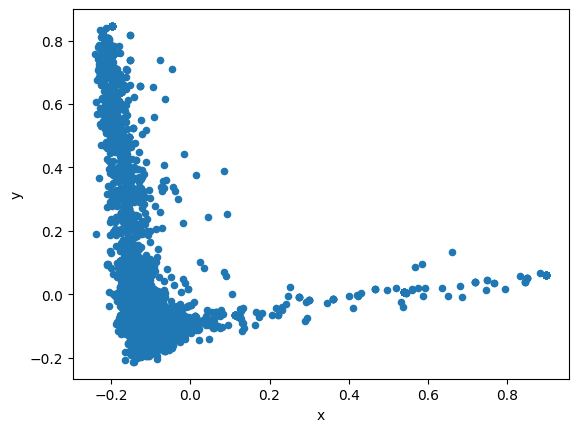

In [92]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline


pca = PCA(n_components=2)

name_of_vector_array = transformed_vector.toarray()

df2d = pd.DataFrame(pca.fit_transform(name_of_vector_array), columns=list('xy'))

df2d.plot(kind='scatter', x='x', y='y')
plt.show()


In [93]:
pd.DataFrame(transformed_vector.toarray())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.249689,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.61498,0.000000,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.391999,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.416501,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.735838,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8720,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.226644,0.00000,0.000000,0.0,0.199312,0.0,0.0
8721,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.226644,0.00000,0.000000,0.0,0.199312,0.0,0.0
8722,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.226644,0.00000,0.000000,0.0,0.199312,0.0,0.0
8723,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.226644,0.00000,0.000000,0.0,0.199312,0.0,0.0


In [94]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=10, random_state=122)

Y = svd_model.fit_transform(transformed_vector)
print('LSA shape:', Y.shape)
pd.DataFrame(Y)

# The code snippet is performing Latent Semantic Analysis (LSA) using Singular Value Decomposition (SVD) on a TF-IDF matrix. Here's what each part of the code does:

# TruncatedSVD
# SVD (Singular Value Decomposition):
# A linear algebra technique used to decompose a matrix into three other matrices, revealing the intrinsic geometric structure of the original matrix.
# Commonly used for dimensionality reduction, noise reduction, and finding latent patterns in data.
# Truncated SVD:
# A variant of SVD that only retains a specified number of the largest singular values, leading to reduced dimensionality.
# Maintains dense outputs without centering data like in PCA (Principal Component Analysis).
# Creating an SVD Model
# TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122):
# n_components=20: Specifies the number of components to keep. This indicates that the resulting vectors will have 20 dimensions, representing a reduced form of the original data.
# algorithm='randomized': Uses a randomized algorithm to approximate SVD, generally faster for large datasets.
# n_iter=100: Number of iterations for convergence. A higher number increases accuracy but also computation time.
# random_state=122: Sets a seed for reproducibility of results.
# Applying the SVD Model
# fit_transform(transformed_vector):
# This method fits the SVD model to the TF-IDF matrix transformed_vector and transforms it into the reduced dimensionality representation.
# The result is a new matrix Y, where each row represents a document and each column represents a component derived from SVD.
# Results
# Y.shape:
# This property gives the shape of the transformed data. It should indicate the number of documents (rows) and the number of retained components (20 columns in this case).
# Explanation
# The purpose of this code snippet is to reduce the dimensionality of the original TF-IDF matrix, typically used for text-based data, while retaining as much of the meaningful structure as possible. This reduction helps with tasks like clustering, classification, or visualization, making computations more efficient and patterns in the data easier to detect.

# With the TruncatedSVD model, the fit_transform() step creates a new matrix where the rows are documents represented in a lower-dimensional space. Each column represents a component derived from the SVD process. This approach is commonly used in Natural Language Processing (NLP) and information retrieval to discover latent structures in a collection of text documents.

LSA shape: (8725, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.022621,0.352077,-0.195500,-0.101809,-0.017955,-0.083540,-0.057787,0.034315,0.679439,0.118079,-0.156828,0.081341,0.213476,0.228100,-0.023022,-0.099120,0.065362,-0.053227,-0.025677,-0.036199
1,0.071493,0.169231,-0.253283,-0.142036,0.071629,0.037677,-0.413843,0.366489,-0.332539,0.272718,0.005753,0.146545,-0.125471,0.109570,0.019141,0.024395,-0.003865,-0.254163,0.084895,0.134158
2,0.060036,0.108284,-0.136154,-0.049422,0.011515,-0.037825,0.049761,-0.026105,-0.061520,-0.113103,-0.066663,-0.074663,-0.002693,-0.020005,0.035393,0.105310,-0.135818,-0.035007,0.036413,0.234071
3,0.017998,0.194469,-0.352183,-0.180692,0.419152,-0.011826,0.077264,-0.537682,-0.153526,0.205253,0.213322,-0.083048,0.183476,-0.204040,0.083245,-0.152603,-0.110307,-0.099957,0.004913,-0.172348
4,0.012926,0.090718,-0.168865,-0.069618,0.069570,-0.055914,0.052168,0.112142,0.072611,-0.194525,-0.010839,-0.210169,-0.093351,-0.096853,0.425586,-0.229595,0.272132,0.194220,0.062854,0.532934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8720,0.014958,0.163918,-0.187538,-0.088790,0.203425,-0.010368,0.095037,0.012092,0.062783,-0.181917,0.067025,-0.121313,-0.017179,0.050831,0.044137,-0.105732,0.072346,0.001042,-0.016131,-0.019152
8721,0.014958,0.163918,-0.187538,-0.088790,0.203425,-0.010368,0.095037,0.012092,0.062783,-0.181917,0.067025,-0.121313,-0.017179,0.050831,0.044137,-0.105732,0.072346,0.001042,-0.016131,-0.019152
8722,0.014958,0.163918,-0.187538,-0.088790,0.203425,-0.010368,0.095037,0.012092,0.062783,-0.181917,0.067025,-0.121313,-0.017179,0.050831,0.044137,-0.105732,0.072346,0.001042,-0.016131,-0.019152
8723,0.014958,0.163918,-0.187538,-0.088790,0.203425,-0.010368,0.095037,0.012092,0.062783,-0.181917,0.067025,-0.121313,-0.017179,0.050831,0.044137,-0.105732,0.072346,0.001042,-0.016131,-0.019152


In [95]:
pd.DataFrame(Y)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.022621,0.352077,-0.195500,-0.101809,-0.017955,-0.083540,-0.057787,0.034315,0.679439,0.118079,-0.156828,0.081341,0.213476,0.228100,-0.023022,-0.099120,0.065362,-0.053227,-0.025677,-0.036199
1,0.071493,0.169231,-0.253283,-0.142036,0.071629,0.037677,-0.413843,0.366489,-0.332539,0.272718,0.005753,0.146545,-0.125471,0.109570,0.019141,0.024395,-0.003865,-0.254163,0.084895,0.134158
2,0.060036,0.108284,-0.136154,-0.049422,0.011515,-0.037825,0.049761,-0.026105,-0.061520,-0.113103,-0.066663,-0.074663,-0.002693,-0.020005,0.035393,0.105310,-0.135818,-0.035007,0.036413,0.234071
3,0.017998,0.194469,-0.352183,-0.180692,0.419152,-0.011826,0.077264,-0.537682,-0.153526,0.205253,0.213322,-0.083048,0.183476,-0.204040,0.083245,-0.152603,-0.110307,-0.099957,0.004913,-0.172348
4,0.012926,0.090718,-0.168865,-0.069618,0.069570,-0.055914,0.052168,0.112142,0.072611,-0.194525,-0.010839,-0.210169,-0.093351,-0.096853,0.425586,-0.229595,0.272132,0.194220,0.062854,0.532934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8720,0.014958,0.163918,-0.187538,-0.088790,0.203425,-0.010368,0.095037,0.012092,0.062783,-0.181917,0.067025,-0.121313,-0.017179,0.050831,0.044137,-0.105732,0.072346,0.001042,-0.016131,-0.019152
8721,0.014958,0.163918,-0.187538,-0.088790,0.203425,-0.010368,0.095037,0.012092,0.062783,-0.181917,0.067025,-0.121313,-0.017179,0.050831,0.044137,-0.105732,0.072346,0.001042,-0.016131,-0.019152
8722,0.014958,0.163918,-0.187538,-0.088790,0.203425,-0.010368,0.095037,0.012092,0.062783,-0.181917,0.067025,-0.121313,-0.017179,0.050831,0.044137,-0.105732,0.072346,0.001042,-0.016131,-0.019152
8723,0.014958,0.163918,-0.187538,-0.088790,0.203425,-0.010368,0.095037,0.012092,0.062783,-0.181917,0.067025,-0.121313,-0.017179,0.050831,0.044137,-0.105732,0.072346,0.001042,-0.016131,-0.019152


In [96]:
#Higher explained variance indicates that the components represent the data's intrinsic structure more accurately
explained_variance = svd_model.explained_variance_ratio_.sum()
print("Sum of explained variance ratio: %d%%" % (int(explained_variance * 100)))


Sum of explained variance ratio: 52%


In [ ]:
# terms = vectorizer.get_feature_names_out() # a list of feature names (terms/words) that the vectorizer uses.
# terms, terms.shape


In [ ]:
# # extracts the top terms (features/words) from each component of a SVD model to understand the underlying topics in a text dataset
# # prints reduced-dimension representation of the text data
# #map the SVD components back to the original terms in the dataset

# print(pd.DataFrame(svd_model.components_).shape) # Each component is a vector where the values represent the importance (weights) of each term in that component
# for i, comp in enumerate(svd_model.components_):
#     terms_comp = zip(terms, comp) # Combines the feature names (terms) with their corresponding weights in the current component.

#     # Sorts the terms by their weight in the component (from highest to lowest).
#     #Selects the top 10 terms for the current component
#     sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
#     print("Topic "+str(i)+": ",end="")
#     for t in sorted_terms:
#         print(t[0],end=" ")
#     print(" ")

In [ ]:
# from nltk.util import ngrams
# bigrams = list(ngrams(sorted_terms, 2))
# print("Bigrams:", bigrams)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(ngram_range=(2, 2))  # Bigrams only
# vec = vectorizer.fit_transform(X)

# print("Feature Names (Bigrams):", vectorizer.get_feature_names_out())
# print("Bigram Count Matrix:\n", vec.toarray())


In [97]:
!pip install wordcloud matplotlib


In [98]:
# df.columns

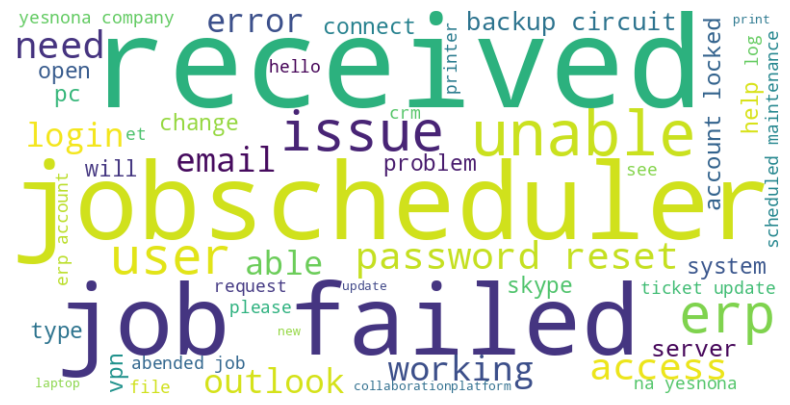

In [99]:
from wordcloud import WordCloud
# Create the WordCloud object with custom settings
wordcloud = WordCloud(
    width=800,  # Set width of the word cloud
    height=400,  # Set height of the word cloud
    background_color='white',  # Set background color
    colormap='viridis',  # Set color map for the word cloud
    max_words=50  # Set the maximum number of words to display
).generate(" ".join(df['Cleaned_Text']))

# Display the word cloud
plt.figure(figsize=(10, 5))  # Set figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud
plt.axis("off")  # Hide axes
plt.show()  # Show the plot


In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Assignment_Group' column to numerical labels
df['Encoded_Group'] = label_encoder.fit_transform(df['Assignment group'])
df['Encoded_Group']

In [101]:
pd.DataFrame(Y).shape, df['Assignment group'].shape

((8725, 20), (8725,))

In [103]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = pd.DataFrame(Y)
y = df['Assignment group']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6980, 20), (1745, 20), (6980,), (1745,))

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize and train Logistic Regression model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

       GRP_0       0.53      0.98      0.69       795
       GRP_1       0.00      0.00      0.00         6
      GRP_10       0.00      0.00      0.00        28
      GRP_11       0.00      0.00      0.00         6
      GRP_12       0.00      0.00      0.00        52
      GRP_13       0.00      0.00      0.00        29
      GRP_14       0.00      0.00      0.00        24
      GRP_15       0.00      0.00      0.00         8
      GRP_16       0.00      0.00      0.00        17
      GRP_17       0.00      0.00      0.00        16
      GRP_18       0.00      0.00      0.00        18
      GRP_19       0.00      0.00      0.00        43
       GRP_2       0.20      0.02      0.04        48
      GRP_20       0.00      0.00      0.00         7
      GRP_21       0.00      0.00      0.00         6
      GRP_22       0.00      0.00      0.00         6
      GRP_23       0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred))


Random Forest - Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       GRP_0       0.62      0.96      0.76       795
       GRP_1       0.00      0.00      0.00         6
      GRP_10       0.00      0.00      0.00        28
      GRP_11       0.00      0.00      0.00         6
      GRP_12       0.52      0.29      0.37        52
      GRP_13       0.36      0.14      0.20        29
      GRP_14       1.00      0.12      0.22        24
      GRP_15       1.00      0.12      0.22         8
      GRP_16       0.00      0.00      0.00        17
      GRP_17       0.93      0.88      0.90        16
      GRP_18       0.00      0.00      0.00        18
      GRP_19       0.20      0.07      0.10        43
       GRP_2       0.75      0.38      0.50        48
      GRP_20       0.00      0.00      0.00         7
      GRP_21       0.00      0.00      0.00         6
      GRP_22       0.00      0.00      0.00         6
      GRP_23       0.00      0.00      0.00         5
      GRP_24       0.65    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting model
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gbm_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred))


Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

       GRP_0       0.63      0.90      0.74       795
       GRP_1       0.00      0.00      0.00         6
      GRP_10       0.40      0.07      0.12        28
      GRP_11       0.00      0.00      0.00         6
      GRP_12       0.33      0.10      0.15        52
      GRP_13       0.43      0.21      0.28        29
      GRP_14       0.14      0.04      0.06        24
      GRP_15       0.17      0.12      0.14         8
      GRP_16       0.00      0.00      0.00        17
      GRP_17       0.92      0.75      0.83        16
      GRP_18       0.38      0.17      0.23        18
      GRP_19       0.29      0.05      0.08        43
       GRP_2       0.67      0.25      0.36        48
      GRP_20       0.00      0.00      0.00         7
      GRP_21       0.00      0.00      0.00         6
      GRP_22       0.11      0.17      0.13         6
      GRP_23       0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
from sklearn.svm import SVC

# Initialize and train Support Vector Classifier (SVM)
svm_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine - Classification Report:")
print(classification_report(y_test, y_pred))


Support Vector Machine - Classification Report:
              precision    recall  f1-score   support

       GRP_0       0.53      1.00      0.69       795
       GRP_1       0.00      0.00      0.00         6
      GRP_10       0.00      0.00      0.00        28
      GRP_11       0.00      0.00      0.00         6
      GRP_12       0.00      0.00      0.00        52
      GRP_13       0.00      0.00      0.00        29
      GRP_14       0.00      0.00      0.00        24
      GRP_15       0.00      0.00      0.00         8
      GRP_16       0.00      0.00      0.00        17
      GRP_17       0.00      0.00      0.00        16
      GRP_18       0.00      0.00      0.00        18
      GRP_19       0.00      0.00      0.00        43
       GRP_2       0.00      0.00      0.00        48
      GRP_20       0.00      0.00      0.00         7
      GRP_21       0.00      0.00      0.00         6
      GRP_22       0.00      0.00      0.00         6
      GRP_23       0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
